<a href="https://colab.research.google.com/github/SangResidata/Python-Data-Cleaning-Study-Case/blob/main/Data_Cleaning_Bandung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **STEP 1 : LOAD and INSPECT**

> Add blockquote



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customer Satisfaction Raw.xlsx to Customer Satisfaction Raw.xlsx


In [ ]:
df_survey= pd.read_excel('Customer Satisfaction Raw.xlsx', sheet_name=0, engine='openpyxl')
df_survey.head()

,Phone Number,Region,area,Sales Area,Micro Cluster,site_id,Level,Category,Hal apa yang membuat kamu puas?,"Other Choice-Lainnya, silakan isi pada kolom dibawah ini :",...,"Other Choice-Lainnya, silakan isi pada kolom dibawah ini :.1",Other Group Dissatisfaction,Data Usage,Survey Status,Week,Survey Sent,Month,Speed,Billing,Wage
0,6433178,EJBN,EAST JAVA,LAMONGAN,MC-GRESIK_SELATAN,NaN,1,Not Satisfied,NaN,NaN,...,NaN,NaN,506.0,Completed,1,4-Jan-23,Januari,50.0,250000.0,12341800.0
1,6617811,CWJ,NORTH CENTRAL JAVA,TEGAL,MC-PEMALANG,NaN,5,Satisfied,Akses internet cepat,NaN,...,NaN,NaN,476.0,Completed,1,4-Jan-23,Januari,100.0,350000.0,12671412.0
2,6332630,JBRO,BOTABEK,TANGERANG,MC-KRONJO,NaN,5,Satisfied,NaN,NaN,...,NaN,NaN,1702.0,Partial,1,4-Jan-23,Januari,100.0,350000.0,9668433.0
3,6548294,KALISULA,KALIMANTAN,BANJARBARU,MC-BARABAI,NaN,5,Satisfied,Akses streaming / nonton video lancar tanpa te...,NaN,...,NaN,NaN,979.0,Completed,1,4-Jan-23,Januari,50.0,250000.0,13975504.0
4,6685804,SUMATERA,SOUTHERN SUMATERA,BANDAR LAMPUNG,MC-PRINGSEWU,NaN,1,Not Satisfied,NaN,NaN,...,NaN,NaN,435.0,Partial,1,4-Jan-23,Januari,50.0,250000.0,12423808.0


In [ ]:
#Check dataset size (rows × cols)
df_survey.shape

(181756, 22)

In [ ]:
#Column types & non-null counts
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181756 entries, 0 to 181755
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Phone Number                                                  181756 non-null  int64  
 1   Region                                                        180586 non-null  object 
 2   area                                                          180586 non-null  object 
 3   Sales Area                                                    180586 non-null  object 
 4   Micro Cluster                                                 180586 non-null  object 
 5   site_id                                                       83881 non-null   object 
 6   Level                                                         181756 non-null  int64  
 7   Category                                                

[link text](https://)### **STEP 2 : CLEAN COLUMN NAMES**

In [ ]:
#Membersihkan whitespace
df_survey.columns = df_survey.columns.str.strip()
df_survey.columns

Index(['Phone Number', 'Region', 'area', 'Sales Area', 'Micro Cluster',
       'site_id', 'Level', 'Category', 'Hal apa yang membuat kamu puas?',
       'Other Choice-Lainnya, silakan isi pada kolom dibawah ini :',
       'Other Group Satisfaction', 'Hal apa yang membuat kamu tidak puas ?',
       'Other Choice-Lainnya, silakan isi pada kolom dibawah ini :.1',
       'Other Group Dissatisfaction', 'Data Usage', 'Survey Status', 'Week',
       'Survey Sent', 'Month', 'Speed', 'Billing', 'Wage'],
      dtype='object')

In [ ]:
#mengubah nama kolom ke bentuk lowercase
df_survey.columns = df_survey.columns.str.lower()
df_survey.columns

Index(['phone number', 'region', 'area', 'sales area', 'micro cluster',
       'site_id', 'level', 'category', 'hal apa yang membuat kamu puas?',
       'other choice-lainnya, silakan isi pada kolom dibawah ini :',
       'other group satisfaction', 'hal apa yang membuat kamu tidak puas ?',
       'other choice-lainnya, silakan isi pada kolom dibawah ini :.1',
       'other group dissatisfaction', 'data usage', 'survey status', 'week',
       'survey sent', 'month', 'speed', 'billing', 'wage'],
      dtype='object')

In [ ]:
#mengubah spasi dengan underscore
df_survey.columns = df_survey.columns.str.replace(' ', '_')
df_survey.columns

Index(['phone_number', 'region', 'area', 'sales_area', 'micro_cluster',
       'site_id', 'level', 'category', 'hal_apa_yang_membuat_kamu_puas?',
       'other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:',
       'other_group_satisfaction', 'hal_apa_yang_membuat_kamu_tidak_puas_?',
       'other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:.1',
       'other_group_dissatisfaction', 'data_usage', 'survey_status', 'week',
       'survey_sent', 'month', 'speed', 'billing', 'wage'],
      dtype='object')

### **STEP 3 : FIX DATA TYPES**

> Add blockquote






In [ ]:
#cek type data pada all kolom
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181756 entries, 0 to 181755
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   phone_number                                                  181756 non-null  int64  
 1   region                                                        180586 non-null  object 
 2   area                                                          180586 non-null  object 
 3   sales_area                                                    180586 non-null  object 
 4   micro_cluster                                                 180586 non-null  object 
 5   site_id                                                       83881 non-null   object 
 6   level                                                         181756 non-null  int64  
 7   category                                                

In [ ]:
# Mengubah tipe data kolom 'billing' dan 'wage' menjadi integer
# Menggunakan errors='coerce' untuk mengubah nilai yang tidak dapat dikonversi menjadi NaN
df_survey['billing'] = pd.to_numeric(df_survey['billing'], errors='coerce').fillna(0).astype(int)
df_survey['wage'] = pd.to_numeric(df_survey['wage'], errors='coerce').fillna(0).astype(int)

# Menampilkan info DataFrame untuk memeriksa tipe data yang baru
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181756 entries, 0 to 181755
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   phone_number                                                  181756 non-null  int64  
 1   region                                                        180586 non-null  object 
 2   area                                                          180586 non-null  object 
 3   sales_area                                                    180586 non-null  object 
 4   micro_cluster                                                 180586 non-null  object 
 5   site_id                                                       83881 non-null   object 
 6   level                                                         181756 non-null  int64  
 7   category                                                

### **STEP 4 : REMOVE DUPLICATES**

1.   List item
2.   List item



In [ ]:
#cek duplikat pada row
df_survey.duplicated().sum()

np.int64(111)

In [ ]:
#menampilkan row mana saja yang terduplikasi
df_survey[df_survey.duplicated]

,phone_number,region,area,sales_area,micro_cluster,site_id,level,category,hal_apa_yang_membuat_kamu_puas?,"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",...,"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:.1",other_group_dissatisfaction,data_usage,survey_status,week,survey_sent,month,speed,billing,wage


In [ ]:
#menghilangkan row yang duplikat
df_survey.drop_duplicates(inplace=True)

In [ ]:
#cek duplikat pada row lagi
df_survey.duplicated().sum()

np.int64(0)

### **STEP 5 : HANDLE OUTLIERS**

---



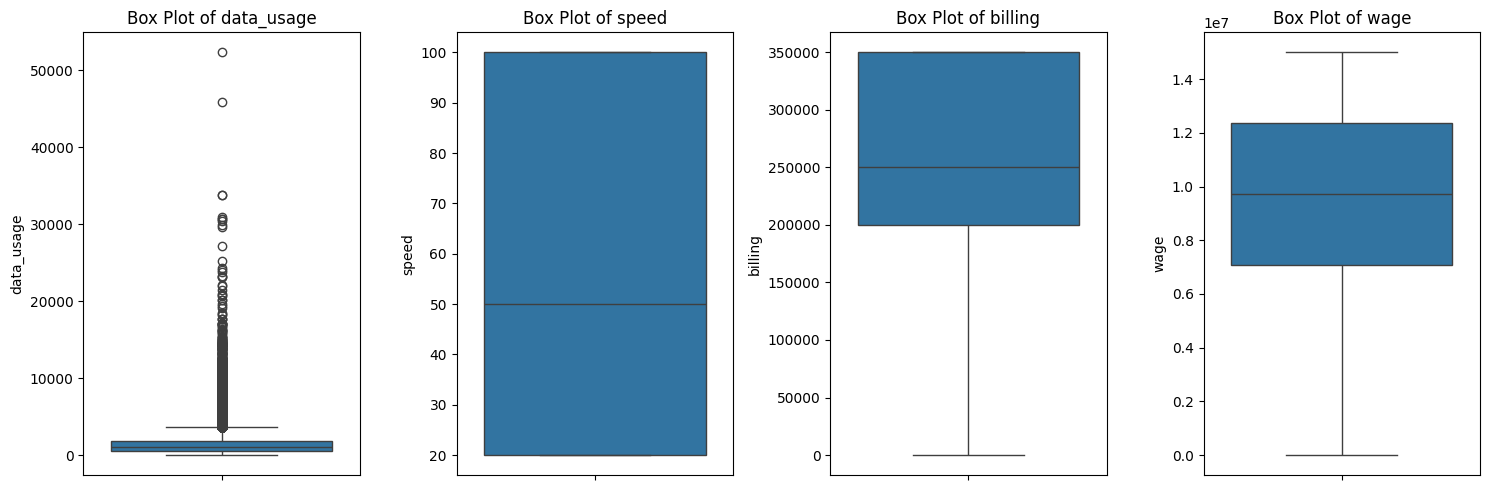

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns to check for outliers
cols_to_check = ['data_usage', 'speed', 'billing', 'wage']

# Create box plots for each selected column
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sns.boxplot(y=df_survey[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

### **Demonstrasi Metode Z-score untuk Deteksi Outlier**

In [ ]:
from scipy.stats import zscore

cols_to_check = ['data_usage', 'speed', 'billing', 'wage']
zscore_threshold = 3 # Anda bisa menyesuaikan threshold ini

print("Outliers detected using Z-score method (threshold = 3):")
for col in cols_to_check:
    if df_survey[col].dtype in ['int64', 'float64']: # Pastikan kolom numerik
        # Calculate z-scores for the column, preserving the index
        df_survey[f'{col}_zscore'] = zscore(df_survey[col], nan_policy='omit')
        outliers_zscore = df_survey[(df_survey[f'{col}_zscore'].abs() > zscore_threshold).fillna(False)] # Fill NaN in boolean series with False
        print(f"\nColumn '{col}': {len(outliers_zscore)} outliers found")
        if not outliers_zscore.empty:
            display(outliers_zscore[[col, f'{col}_zscore']].head()) # Tampilkan beberapa contoh outliers

Outliers detected using Z-score method (threshold = 3):

Column 'data_usage': 2876 outliers found


,data_usage,data_usage_zscore
46,5668.0,3.364362
86,5487.0,3.222259
249,8548.0,5.625436
411,5933.0,3.572412
522,5416.0,3.166518



Column 'speed': 0 outliers found

Column 'billing': 832 outliers found


,billing,billing_zscore
70,0,-4.097186
318,0,-4.097186
996,0,-4.097186
1503,0,-4.097186
1604,0,-4.097186



Column 'wage': 628 outliers found


,wage,wage_zscore
340,0,-3.152413
1518,0,-3.152413
1628,0,-3.152413
1922,0,-3.152413
1973,0,-3.152413


### **Demonstrasi Metode IQR untuk Deteksi Outlier**

In [ ]:
cols_to_check = ['data_usage', 'speed', 'billing', 'wage']

print("Outliers detected using IQR method:")
for col in cols_to_check:
    if df_survey[col].dtype in ['int64', 'float64']: # Pastikan kolom numerik
        Q1 = df_survey[col].quantile(0.25)
        Q3 = df_survey[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_iqr = df_survey[(df_survey[col] < lower_bound) | (df_survey[col] > upper_bound)]
        print(f"\nColumn '{col}': {len(outliers_iqr)} outliers found")
        if not outliers_iqr.empty:
            display(outliers_iqr[col].head()) # Tampilkan beberapa contoh outliers

Outliers detected using IQR method:

Column 'data_usage': 8295 outliers found


,data_usage
36,3874.0
46,5668.0
48,4002.0
86,5487.0
133,4174.0



Column 'speed': 0 outliers found

Column 'billing': 0 outliers found

Column 'wage': 0 outliers found


In [ ]:
# Calculate IQR for 'data_usage'
Q1_data_usage = df_survey['data_usage'].quantile(0.25)
Q3_data_usage = df_survey['data_usage'].quantile(0.75)
IQR_data_usage = Q3_data_usage - Q1_data_usage

# Define outlier bounds for 'data_usage' using IQR
lower_bound_data_usage = Q1_data_usage - 1.5 * IQR_data_usage
upper_bound_data_usage = Q3_data_usage + 1.5 * IQR_data_usage

# Identify outliers in 'data_usage'
outliers_data_usage = df_survey[(df_survey['data_usage'] < lower_bound_data_usage) | (df_survey['data_usage'] > upper_bound_data_usage)]

# Remove rows with outliers in 'data_usage'
df_survey_cleaned = df_survey.drop(outliers_data_usage.index)

print(f"Jumlah baris sebelum menghapus outlier: {len(df_survey)}")
print(f"Jumlah baris setelah menghapus outlier di 'data_usage': {len(df_survey_cleaned)}")

# Display the first few rows of the cleaned DataFrame
display(df_survey_cleaned.head())

Jumlah baris sebelum menghapus outlier: 181645
Jumlah baris setelah menghapus outlier di 'data_usage': 173350


,phone_number,region,area,sales_area,micro_cluster,site_id,level,category,hal_apa_yang_membuat_kamu_puas?,"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",...,week,survey_sent,month,speed,billing,wage,data_usage_zscore,speed_zscore,billing_zscore,wage_zscore
0,6433178,EJBN,EAST JAVA,LAMONGAN,MC-GRESIK_SELATAN,NaN,1,Not Satisfied,NaN,NaN,...,1,4-Jan-23,Januari,50.0,250000,12341800,-0.688300,-0.201170,-0.237767,0.852199
1,6617811,CWJ,NORTH CENTRAL JAVA,TEGAL,MC-PEMALANG,NaN,5,Satisfied,Akses internet cepat,NaN,...,1,4-Jan-23,Januari,100.0,350000,12671412,-0.711853,1.313925,1.306000,0.959150
2,6332630,JBRO,BOTABEK,TANGERANG,MC-KRONJO,NaN,5,Satisfied,NaN,NaN,...,1,4-Jan-23,Januari,100.0,350000,9668433,0.250674,1.313925,1.306000,-0.015243
3,6548294,KALISULA,KALIMANTAN,BANJARBARU,MC-BARABAI,NaN,5,Satisfied,Akses streaming / nonton video lancar tanpa te...,NaN,...,1,4-Jan-23,Januari,50.0,250000,13975504,-0.316950,-0.201170,-0.237767,1.382296
4,6685804,SUMATERA,SOUTHERN SUMATERA,BANDAR LAMPUNG,MC-PRINGSEWU,NaN,1,Not Satisfied,NaN,NaN,...,1,4-Jan-23,Januari,50.0,250000,12423808,-0.744042,-0.201170,-0.237767,0.878809


### **STEP 6 : CLEAN STRINGS/TEXT DATA**

1.   List item

1.   List item
2.   List item


2.   List item



In [ ]:
import re

# Select object type columns from the original DataFrame (before cleaning)
object_cols = df_survey.select_dtypes(include='object').columns

print("Detecting whitespace and special characters in object columns:")

for col in object_cols:
    print(f"\nChecking column: '{col}'")

    # Check for leading/trailing whitespace
    leading_trailing_whitespace = df_survey[col].astype(str).str.match(r'^\s|\s$').any()
    if leading_trailing_whitespace:
        print(f"  - Contains leading/trailing whitespace.")
        # Display some examples
        whitespace_examples = df_survey[df_survey[col].astype(str).str.match(r'^\s|\s$').fillna(False)][col].unique()
        if len(whitespace_examples) > 5:
            display(whitespace_examples[:5])
        else:
            display(whitespace_examples)


    # Check for special characters (non-alphanumeric and not space)
    special_characters = df_survey[col].astype(str).str.contains(r'[^a-zA-Z0-9\s]').any()
    if special_characters:
        print(f"  - Contains special characters.")
        # Display some examples
        special_char_examples = df_survey[df_survey[col].astype(str).str.contains(r'[^a-zA-Z0-9\s]').fillna(False)][col].unique()
        if len(special_char_examples) > 5:
            display(special_char_examples[:5])
        else:
            display(special_char_examples)

    if not leading_trailing_whitespace and not special_characters:
        print("  - No leading/trailing whitespace or special characters detected.")

Detecting whitespace and special characters in object columns:

Checking column: 'region'
  - No leading/trailing whitespace or special characters detected.

Checking column: 'area'
  - No leading/trailing whitespace or special characters detected.

Checking column: 'sales_area'
  - Contains special characters.


array(['KAB. BANDUNG', 'NORTH & CENTRAL JAKARTA', 'METRO - KOTA BUMI'],
      dtype=object)


Checking column: 'micro_cluster'
  - Contains special characters.


array(['MC-GRESIK_SELATAN', 'MC-PEMALANG', 'MC-KRONJO', 'MC-BARABAI',
       'MC-PRINGSEWU'], dtype=object)


Checking column: 'site_id'
  - No leading/trailing whitespace or special characters detected.

Checking column: 'category'
  - No leading/trailing whitespace or special characters detected.

Checking column: 'hal_apa_yang_membuat_kamu_puas?'
  - Contains special characters.


array(['Akses streaming / nonton video lancar tanpa terputus',
       'Lainnya, silakan isi pada kolom dibawah ini :',
       'Koneksi internet stabil saat di pedesaan/pegunungan',
       'Lainnya, silakan isi pada kolom dibawah ini (terkait kualitas jaringan) :',
       'Koneksi internet stabil saat di pegunungan/dataran tinggi'],
      dtype=object)


Checking column: 'other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:'
  - Contains leading/trailing whitespace.


array([' '], dtype=object)

  - Contains special characters.


array(['Sinyal kuat,  tp punya kelemahan kalau bisa dirubah jika kuota masih sisa tp masanya habis harusnya saat di isi baru sisa kuota lama ikut nambah di kuota baru jadi gak terbuang sia2 sisanya kalau ginikan jadi gak berani beli kuota yg gede takut terbuang sia2',
       'Paket internet murah, walaupun sinyal kadang hilang tiba2',
       'Bagus sih , cuma tergantung tempat',
       'Karena harganya murah dan banyak diskon setiap bulan :)',
       'Koneksi Internet stabil di dalam dan luar kota, apalgi kalo di pedesaan masih cuk baik.'],
      dtype=object)


Checking column: 'other_group_satisfaction'
  - Contains special characters.


array(['Other, Affordable package price',
       'Other, Expensive package price', 'Other, Weak signal while rainy',
       'Other, Unstable signal everywhere', 'Other, Many promo offers'],
      dtype=object)


Checking column: 'hal_apa_yang_membuat_kamu_tidak_puas_?'
  - Contains special characters.


array(['Tidak bisa internetan, padahal sinyal full',
       'Sinyal 4G lemah (hanya 1-2 bar) di dalam Rumah',
       'Lainnya, silakan isi pada kolom dibawah ini :',
       'Sinyal 4G lemah (hanya 1-2 bar) di daerah pedesaan',
       'Sinyal 4G lemah (hanya 1-2 bar) di dalam Gedung'], dtype=object)


Checking column: 'other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:.1'
  - Contains special characters.


array(['Cuaca mendung biasanya sinyal langsung hilang.',
       'Sinyal 4G lemah (hanya 1-2 bar) di daerah pedesaan',
       'Mulai jam 6 malam, sinyal sangat lama/lemot padahal sinyal 4G dan full bar',
       'Sinyal nya suka ngilang tiba"',
       'Sinyal lemah saat di pedesaan, koneksi internet tidak stabil di dalam gedung terkadang sinyal full tapi tidak bisa internetan.'],
      dtype=object)


Checking column: 'other_group_dissatisfaction'
  - Contains special characters.


array(['Weak 4G (only 1-2 bar) signal inside building',
       'Weak 4G (only 1-2 bar) signal inside house',
       'Other, Expensive package price', 'Other, signal is often lost',
       'Weak 4G (only 1-2 bar) signal in the rural area'], dtype=object)


Checking column: 'survey_status'
  - No leading/trailing whitespace or special characters detected.

Checking column: 'survey_sent'
  - Contains special characters.


array(['4-Jan-23', '3-Jan-23', '2-Jan-23', '11-Jan-23', '10-Jan-23'],
      dtype=object)


Checking column: 'month'
  - No leading/trailing whitespace or special characters detected.


In [ ]:
import re

# Select object type columns
object_cols = df_survey_cleaned.select_dtypes(include='object').columns

# Function to clean string data
def clean_string(text):
    if isinstance(text, str):
        text = text.strip() # Strip whitespace
        text = text.lower() # Convert to lowercase
        # Remove special characters (you can customize this regex)
        text = re.sub(r'[^a-z0-9\s]', '', text) # Keep only lowercase letters, numbers, and spaces
        return text
    return text # Return non-string values as is

# Apply cleaning function to object columns
for col in object_cols:
    df_survey_cleaned[col] = df_survey_cleaned[col].apply(clean_string)

# Display the first few rows to verify the cleaning
display(df_survey_cleaned.head())

,phone_number,region,area,sales_area,micro_cluster,site_id,level,category,hal_apa_yang_membuat_kamu_puas?,"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",...,week,survey_sent,month,speed,billing,wage,data_usage_zscore,speed_zscore,billing_zscore,wage_zscore
0,6433178,ejbn,east java,lamongan,mcgresikselatan,NaN,1,not satisfied,NaN,NaN,...,1,4jan23,januari,50.0,250000,12341800,-0.688300,-0.201170,-0.237767,0.852199
1,6617811,cwj,north central java,tegal,mcpemalang,NaN,5,satisfied,akses internet cepat,NaN,...,1,4jan23,januari,100.0,350000,12671412,-0.711853,1.313925,1.306000,0.959150
2,6332630,jbro,botabek,tangerang,mckronjo,NaN,5,satisfied,NaN,NaN,...,1,4jan23,januari,100.0,350000,9668433,0.250674,1.313925,1.306000,-0.015243
3,6548294,kalisula,kalimantan,banjarbaru,mcbarabai,NaN,5,satisfied,akses streaming nonton video lancar tanpa ter...,NaN,...,1,4jan23,januari,50.0,250000,13975504,-0.316950,-0.201170,-0.237767,1.382296
4,6685804,sumatera,southern sumatera,bandar lampung,mcpringsewu,NaN,1,not satisfied,NaN,NaN,...,1,4jan23,januari,50.0,250000,12423808,-0.744042,-0.201170,-0.237767,0.878809


### **STEP 7 : STANDARDIZE AND NORMALIZE VALUES**

1.   List item
2.   List item



### **Scaling Numerical Columns using StandardScaler and MinMaxScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Select the numerical columns to scale
cols_to_scale = ['data_usage', 'speed', 'billing', 'wage']

# Make a copy of the cleaned DataFrame to avoid modifying the original during demonstration
df_scaled_standard = df_survey_cleaned.copy()
df_scaled_minmax = df_survey_cleaned.copy()

# Drop rows with NaN values in the selected columns for scaling, as scalers don't handle NaNs
# Alternatively, you could impute missing values before scaling
df_scaled_standard.dropna(subset=cols_to_scale, inplace=True)
df_scaled_minmax.dropna(subset=cols_to_scale, inplace=True)


# --- Using StandardScaler ---
scaler_standard = StandardScaler()
# Fit and transform the selected columns
df_scaled_standard[cols_to_scale] = scaler_standard.fit_transform(df_scaled_standard[cols_to_scale])

print("DataFrame after StandardScaler scaling:")
display(df_scaled_standard[cols_to_scale].head())


# --- Using MinMaxScaler ---
scaler_minmax = MinMaxScaler()
# Fit and transform the selected columns
df_scaled_minmax[cols_to_scale] = scaler_minmax.fit_transform(df_scaled_minmax[cols_to_scale])

print("\nDataFrame after MinMaxScaler scaling:")
display(df_scaled_minmax[cols_to_scale].head())

DataFrame after StandardScaler scaling:


,data_usage,speed,billing,wage
0,-0.848998,-0.201010,-0.262330,0.852468
1,-0.886294,1.314011,1.332741,0.959432
2,0.637840,1.314011,1.332741,-0.015085
3,-0.260976,-0.201010,-0.262330,1.382632
4,-0.937264,-0.201010,-0.262330,0.879081



DataFrame after MinMaxScaler scaling:


,data_usage,speed,billing,wage
0,0.137725,0.375,0.714286,0.822791
1,0.129559,1.000,1.000000,0.844766
2,0.463255,1.000,1.000000,0.644566
3,0.266467,0.375,0.714286,0.931706
4,0.118400,0.375,0.714286,0.828259


### **STEP 8 : Rename / Drop / Reorder Columns**

> Add blockquote



In [ ]:
# Deteksi nilai unik pada kolom 'survey_status'
unique_survey_status = df_scaled_minmax['survey_status'].unique()

# Tampilkan nilai unik
print("Nilai unik pada kolom 'survey_status':")
display(unique_survey_status)

Nilai unik pada kolom 'survey_status':


array(['completed', 'partial', 'complexed', 'compleetd', 'aprtial',
       'pratial', 'pamtial', 'parpial', 'parrial', 'completde',
       'ocmpleted', 'completld', 'complteed', 'oompleted', 'compeeted',
       'complited', 'compljted', 'uompleted', 'partiil', 'partila',
       'cmopleted', 'comzleted', 'compldted', 'paotial', 'complgted',
       'compelted', 'jompleted', 'completpd', 'comlpeted', 'comhleted',
       'copmleted', 'compdeted', 'cowpleted', 'coopleted', 'pbrtial',
       'compzeted', 'parital', 'cympleted', 'completea', 'iompleted',
       'partiml', 'complvted', 'patrial', 'compieted', 'completeq',
       'compleoed', 'sompleted', 'comqleted', 'comppeted', 'partsal',
       'partoal', 'cwmpleted', 'bompleted', 'yompleted', 'completee',
       'completeg', 'compoeted', 'compleyed', 'complehed', 'tompleted',
       'complethd', 'compleded', 'compyeted', 'cojpleted', 'compreted',
       'complebed', 'pardial', 'cxmpleted', 'conpleted', 'completkd',
       'complhted', 'com

In [ ]:
# Define a mapping for known variations to standardized values
status_mapping = {
    'completed': 'completed',
    'compleetd': 'completed',
    'completde': 'completed',
    'ocmpleted': 'completed',
    'completld': 'completed',
    'complteed': 'completed',
    'oompleted': 'completed',
    'compeeted': 'completed',
    'complited': 'completed',
    'compljted': 'completed',
    'uompleted': 'completed',
    'cmopleted': 'completed',
    'comzleted': 'completed',
    'compldted': 'completed',
    'complgted': 'completed',
    'compelted': 'completed',
    'jompleted': 'completed',
    'completpd': 'completed',
    'comlpeted': 'completed',
    'comhleted': 'completed',
    'copmleted': 'completed',
    'compdeted': 'completed',
    'cowpleted': 'completed',
    'coopleted': 'completed',
    'compzeted': 'completed',
    'cympleted': 'completed',
    'completea': 'completed',
    'iompleted': 'completed',
    'complvted': 'completed',
    'compieted': 'completed',
    'completeq': 'completed',
    'compleoed': 'completed',
    'sompleted': 'completed',
    'comqleted': 'completed',
    'comppeted': 'completed',
    'cwmpleted': 'completed',
    'bompleted': 'completed',
    'yompleted': 'completed',
    'completee': 'completed',
    'completeg': 'completed',
    'compoeted': 'completed',
    'compleyed': 'completed',
    'complehed': 'completed',
    'tompleted': 'completed',
    'complethd': 'completed',
    'compleded': 'completed',
    'compyeted': 'completed',
    'cojpleted': 'completed',
    'compreted': 'completed',
    'complebed': 'completed',
    'cxmpleted': 'completed',
    'conpleted': 'completed',
    'completkd': 'completed',
    'complhted': 'completed',
    'comxleted': 'completed',
    'mompleted': 'completed',
    'complwted': 'completed',
    'hompleted': 'completed',
    'coxpleted': 'completed',
    'completod': 'completed',
    'compaeted': 'completed',
    'completjd': 'completed',
    'completvd': 'completed',
    'compneted': 'completed',
    'cumpleted': 'completed',
    'compqeted': 'completed',
    'comjleted': 'completed',
    'completez': 'completed',
    'clmpleted': 'completed',
    'pompleted': 'completed',
    'comcleted': 'completed',
    'completmd': 'completed',
    'complejed': 'completed',
    'complewed': 'completed',
    'complfted': 'completed',
    'complefed': 'completed',
    'completey': 'completed',
    'completek': 'completed',
    'compluted': 'completed',
    'eompleted': 'completed',
    'complmted': 'completed',
    'cempleted': 'completed',
    'cospleted': 'completed',
    'compleaed': 'completed',
    'complemed': 'completed',
    'completej': 'completed',
    'complettd': 'completed',
    'ccmpleted': 'completed',
    'coypleted': 'completed',
    'complyted': 'completed',
    'completev': 'completed',
    'gompleted': 'completed',
    'ckmpleted': 'completed',
    'czmpleted': 'completed',
    'cfmpleted': 'completed',
    'comoleted': 'completed',
    'comuleted': 'completed',
    'compleied': 'completed',
    'comyleted': 'completed',
    'completef': 'completed',
    'complzted': 'completed',
    'coqpleted': 'completed',
    'cvmpleted': 'completed',
    'partial': 'partial',
    'aprtial': 'partial',
    'pratial': 'partial',
    'pamtial': 'partial',
    'parpial': 'partial',
    'parrial': 'partial',
    'partiil': 'partial',
    'partila': 'partial',
    'paotial': 'partial',
    'parital': 'partial',
    'partiml': 'partial',
    'patrial': 'partial',
    'partsal': 'partial',
    'partoal': 'partial',
    'pardial': 'partial',
    'psrtial': 'partial',
    'partail': 'partial',
    'ptrtial': 'partial',
    'paruial': 'partial',
}

# Apply the mapping to the 'survey_status' column
# Use .map() and fillna(pd.NA) to keep values not in mapping as NA
df_scaled_minmax['survey_status_cleaned'] = df_scaled_minmax['survey_status'].map(status_mapping)

# Drop rows where the mapped value is NA (i.e., original value was not in the mapping)
df_scaled_minmax_cleaned = df_scaled_minmax.dropna(subset=['survey_status_cleaned']).copy()

# Optionally, drop the original 'survey_status' column and rename the cleaned one
# df_scaled_minmax_cleaned = df_scaled_minmax_cleaned.drop('survey_status', axis=1)
# df_scaled_minmax_cleaned = df_scaled_minmax_cleaned.rename(columns={'survey_status_cleaned': 'survey_status'})


print(f"Jumlah baris sebelum standardisasi: {len(df_scaled_minmax)}")
print(f"Jumlah baris setelah standardisasi dan menghapus nilai tidak sesuai: {len(df_scaled_minmax_cleaned)}")

# Display the counts of unique values in the cleaned column
print("\nCounts of standardized 'survey_status' values:")
display(df_scaled_minmax_cleaned['survey_status_cleaned'].value_counts())

# Display the first few rows of the cleaned DataFrame with the new column
display(df_scaled_minmax_cleaned.head())

Jumlah baris sebelum standardisasi: 167916
Jumlah baris setelah standardisasi dan menghapus nilai tidak sesuai: 167914

Counts of standardized 'survey_status' values:


,count
survey_status_cleaned,
completed,140182
partial,27732


,phone_number,region,area,sales_area,micro_cluster,site_id,level,category,hal_apa_yang_membuat_kamu_puas?,"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",...,survey_sent,month,speed,billing,wage,data_usage_zscore,speed_zscore,billing_zscore,wage_zscore,survey_status_cleaned
0,6433178,ejbn,east java,lamongan,mcgresikselatan,NaN,1,not satisfied,NaN,NaN,...,4jan23,januari,0.375,0.714286,0.822791,-0.688300,-0.201170,-0.237767,0.852199,completed
1,6617811,cwj,north central java,tegal,mcpemalang,NaN,5,satisfied,akses internet cepat,NaN,...,4jan23,januari,1.000,1.000000,0.844766,-0.711853,1.313925,1.306000,0.959150,completed
2,6332630,jbro,botabek,tangerang,mckronjo,NaN,5,satisfied,NaN,NaN,...,4jan23,januari,1.000,1.000000,0.644566,0.250674,1.313925,1.306000,-0.015243,partial
3,6548294,kalisula,kalimantan,banjarbaru,mcbarabai,NaN,5,satisfied,akses streaming nonton video lancar tanpa ter...,NaN,...,4jan23,januari,0.375,0.714286,0.931706,-0.316950,-0.201170,-0.237767,1.382296,completed
4,6685804,sumatera,southern sumatera,bandar lampung,mcpringsewu,NaN,1,not satisfied,NaN,NaN,...,4jan23,januari,0.375,0.714286,0.828259,-0.744042,-0.201170,-0.237767,0.878809,partial


In [ ]:
# Deteksi nilai unik pada kolom 'survey_status_cleaned'
unique_survey_status = df_scaled_minmax_cleaned['survey_status_cleaned'].unique()

# Tampilkan nilai unik
print("Nilai unik pada kolom 'survey_status_cleaned':")
display(unique_survey_status)

Nilai unik pada kolom 'survey_status_cleaned':


array(['completed', 'partial'], dtype=object)

### **STEP 9 : HANDLE MISSING DATA**

1.   List item
2.   List item



In [ ]:
# Filter the DataFrame to keep only rows where 'survey_status_cleaned' is 'completed'
df_completed_only = df_scaled_minmax_cleaned[df_scaled_minmax_cleaned['survey_status_cleaned'] == 'completed'].copy()

print(f"Jumlah baris sebelum menghapus 'partial': {len(df_scaled_minmax_cleaned)}")
print(f"Jumlah baris setelah hanya menyisakan 'completed': {len(df_completed_only)}")

# Display the counts of unique values in the filtered DataFrame to verify
print("\nCounts of 'survey_status_cleaned' values in the filtered DataFrame:")
display(df_completed_only['survey_status_cleaned'].value_counts())

# Display the first few rows of the filtered DataFrame
display(df_completed_only.head())

Jumlah baris sebelum menghapus 'partial': 167914
Jumlah baris setelah hanya menyisakan 'completed': 140182

Counts of 'survey_status_cleaned' values in the filtered DataFrame:


,count
survey_status_cleaned,
completed,140182


,phone_number,region,area,sales_area,micro_cluster,site_id,level,category,hal_apa_yang_membuat_kamu_puas?,"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",...,survey_sent,month,speed,billing,wage,data_usage_zscore,speed_zscore,billing_zscore,wage_zscore,survey_status_cleaned
0,6433178,ejbn,east java,lamongan,mcgresikselatan,NaN,1,not satisfied,NaN,NaN,...,4jan23,januari,0.375,0.714286,0.822791,-0.688300,-0.201170,-0.237767,0.852199,completed
1,6617811,cwj,north central java,tegal,mcpemalang,NaN,5,satisfied,akses internet cepat,NaN,...,4jan23,januari,1.000,1.000000,0.844766,-0.711853,1.313925,1.306000,0.959150,completed
3,6548294,kalisula,kalimantan,banjarbaru,mcbarabai,NaN,5,satisfied,akses streaming nonton video lancar tanpa ter...,NaN,...,4jan23,januari,0.375,0.714286,0.931706,-0.316950,-0.201170,-0.237767,1.382296,completed
5,6625926,ejbn,east java,madura,mcbangkalan,NaN,4,satisfied,koneksi internet stabil di dalam rumah,NaN,...,4jan23,januari,0.000,0.571429,0.844111,-0.445706,-1.110226,-1.009651,0.955965,completed
6,6722628,ejbn,east java,malang,mcturen,NaN,3,not satisfied,NaN,NaN,...,4jan23,januari,1.000,1.000000,0.491939,0.115637,1.313925,1.306000,-0.758092,completed


In [ ]:
#Deteksi missing values
df_scaled_minmax_cleaned.isnull().sum()

,0
phone_number,0
region,1115
area,1115
sales_area,1115
micro_cluster,1115
site_id,93528
level,0
category,0
hal_apa_yang_membuat_kamu_puas?,75111
"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",159966


In [ ]:
df_scaled_minmax_cleaned.isna().sum()

,0
phone_number,0
region,1115
area,1115
sales_area,1115
micro_cluster,1115
site_id,93528
level,0
category,0
hal_apa_yang_membuat_kamu_puas?,75111
"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",159966


In [ ]:
# Select the columns to check for paired missing values
cols_to_check = ['region', 'area', 'sales_area', 'micro_cluster']

# Filter the DataFrame to find rows where all selected columns are null
missing_in_all_cols = df_scaled_minmax_cleaned[df_scaled_minmax_cleaned[cols_to_check].isnull().all(axis=1)]

print(f"Jumlah baris di mana semua kolom '{', '.join(cols_to_check)}' missing secara bersamaan:")
display(len(missing_in_all_cols))

# Display the head of these rows to see if they are the same rows
display(missing_in_all_cols.head())

Jumlah baris di mana semua kolom 'region, area, sales_area, micro_cluster' missing secara bersamaan:


1115

,phone_number,region,area,sales_area,micro_cluster,site_id,level,category,hal_apa_yang_membuat_kamu_puas?,"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",...,survey_sent,month,speed,billing,wage,data_usage_zscore,speed_zscore,billing_zscore,wage_zscore,survey_status_cleaned
61771,6729570,NaN,NaN,NaN,NaN,NaN,5,satisfied,koneksi internet stabil saat main game,NaN,...,20230313,mar,0.000,0.571429,0.387255,-0.371122,-1.110226,-1.009651,-1.267602,completed
61772,6559507,NaN,NaN,NaN,NaN,NaN,5,satisfied,sinyal 4g kuat,NaN,...,20230313,mar,1.000,1.000000,0.448647,0.388850,1.313925,1.306000,-0.968798,completed
61773,6705667,NaN,NaN,NaN,NaN,NaN,5,satisfied,koneksi internet stabil di luar rumah,NaN,...,20230313,mar,1.000,1.000000,0.419378,-0.710283,1.313925,1.306000,-1.111254,completed
61774,6385640,NaN,NaN,NaN,NaN,NaN,3,not satisfied,NaN,NaN,...,20230313,mar,0.375,0.714286,0.748438,1.009076,-0.201170,-0.237767,0.490312,completed
61775,6742262,NaN,NaN,NaN,NaN,NaN,4,satisfied,NaN,NaN,...,20230313,mar,0.375,0.714286,0.395471,-0.375832,-0.201170,-0.237767,-1.227616,partial


In [ ]:
# Identify the index of rows where all specified columns are null
cols_to_check = ['region', 'area', 'sales_area', 'micro_cluster']
index_to_drop = df_scaled_minmax_cleaned[df_scaled_minmax_cleaned[cols_to_check].isnull().all(axis=1)].index

# Drop these rows from the DataFrame
df_scaled_minmax_cleaned_dropped = df_scaled_minmax_cleaned.drop(index_to_drop)

print(f"Jumlah baris sebelum menghapus: {len(df_scaled_minmax_cleaned)}")
print(f"Jumlah baris setelah menghapus baris dengan missing value berpasangan: {len(df_scaled_minmax_cleaned_dropped)}")

# Verify that these missing values are gone
print("\nJumlah missing value setelah menghapus:")
display(df_scaled_minmax_cleaned_dropped[cols_to_check].isnull().sum())

Jumlah baris sebelum menghapus: 167914
Jumlah baris setelah menghapus baris dengan missing value berpasangan: 166799

Jumlah missing value setelah menghapus:


,0
region,0
area,0
sales_area,0
micro_cluster,0


In [ ]:
df_scaled_minmax_cleaned_dropped.isnull().sum()

,0
phone_number,0
region,0
area,0
sales_area,0
micro_cluster,0
site_id,92413
level,0
category,0
hal_apa_yang_membuat_kamu_puas?,74704
"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",158899


In [ ]:
# Calculate the mode (most frequent value) of the 'site_id' column
# Use .mode()[0] to handle cases where there might be multiple modes
site_id_mode = df_scaled_minmax_cleaned_dropped['site_id'].mode()[0]

print(f"Mode dari kolom 'site_id': {site_id_mode}")

# Fill missing values in 'site_id' with the calculated mode using the recommended approach
df_scaled_minmax_cleaned_dropped['site_id'] = df_scaled_minmax_cleaned_dropped['site_id'].fillna(site_id_mode)

# Verify that there are no more missing values in 'site_id'
print("\nJumlah missing value pada kolom 'site_id' setelah imputasi:")
display(df_scaled_minmax_cleaned_dropped['site_id'].isnull().sum())

# Display the first few rows to see the effect of imputation
display(df_scaled_minmax_cleaned_dropped.head())

Mode dari kolom 'site_id': 12jkb0501

Jumlah missing value pada kolom 'site_id' setelah imputasi:


np.int64(0)

,phone_number,region,area,sales_area,micro_cluster,site_id,level,category,hal_apa_yang_membuat_kamu_puas?,"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",...,survey_sent,month,speed,billing,wage,data_usage_zscore,speed_zscore,billing_zscore,wage_zscore,survey_status_cleaned
0,6433178,ejbn,east java,lamongan,mcgresikselatan,12jkb0501,1,not satisfied,NaN,NaN,...,4jan23,januari,0.375,0.714286,0.822791,-0.688300,-0.201170,-0.237767,0.852199,completed
1,6617811,cwj,north central java,tegal,mcpemalang,12jkb0501,5,satisfied,akses internet cepat,NaN,...,4jan23,januari,1.000,1.000000,0.844766,-0.711853,1.313925,1.306000,0.959150,completed
2,6332630,jbro,botabek,tangerang,mckronjo,12jkb0501,5,satisfied,NaN,NaN,...,4jan23,januari,1.000,1.000000,0.644566,0.250674,1.313925,1.306000,-0.015243,partial
3,6548294,kalisula,kalimantan,banjarbaru,mcbarabai,12jkb0501,5,satisfied,akses streaming nonton video lancar tanpa ter...,NaN,...,4jan23,januari,0.375,0.714286,0.931706,-0.316950,-0.201170,-0.237767,1.382296,completed
4,6685804,sumatera,southern sumatera,bandar lampung,mcpringsewu,12jkb0501,1,not satisfied,NaN,NaN,...,4jan23,januari,0.375,0.714286,0.828259,-0.744042,-0.201170,-0.237767,0.878809,partial


In [ ]:
# Get the top 5 most frequent values in 'site_id'
top_5_site_id = df_scaled_minmax_cleaned_dropped['site_id'].value_counts().head(5)

print("5 nilai site_id yang paling sering muncul:")
display(top_5_site_id)

5 nilai site_id yang paling sering muncul:


,count
site_id,
12jkb0501,92429
13dpk0062,16
13cbn1201,16
12jku0117,15
12jks0470,15


In [ ]:
df_scaled_minmax_cleaned_dropped.isnull().sum()

,0
phone_number,0
region,0
area,0
sales_area,0
micro_cluster,0
site_id,0
level,0
category,0
hal_apa_yang_membuat_kamu_puas?,74704
"other_choice-lainnya,_silakan_isi_pada_kolom_dibawah_ini_:",158899


In [ ]:
# Export the DataFrame to an Excel file
output_filename = 'Customer Satisfaction Survey Bersih.xlsx'
df_scaled_minmax_cleaned_dropped.to_excel(output_filename, index=False)

print(f"DataFrame berhasil diekspor ke '{output_filename}'")

DataFrame berhasil diekspor ke 'Customer Satisfaction Survey Bersih.xlsx'
